In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
import pickle

pickle_in = open('/content/drive/MyDrive/Mask_Detection/X.pickle','rb')
X= pickle.load(pickle_in)

pickle_in = open('/content/drive/MyDrive/Mask_Detection/Y.pickle','rb')
y = pickle.load(pickle_in)

**Transfer learning**


In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model (inputs= base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(X,y,test_size=0.1)

In [ ]:
history=new_model.fit(train_data,train_target,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
44/44 [==============================] - 47s 1s/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2/10
44/44 [==============================] - 48s 1s/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 3/10
44/44 [==============================] - 47s 1s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 47s 1s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 47s 1s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 47s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 47s 1s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/10
44/44 [==

In [ ]:
#history = new_model.fit(X,y,epochs=1,validation_split=0.1)

55/55 [==============================] - 241s 4s/step - loss: 0.0350 - accuracy: 0.9954 - val_loss: 1.3697 - val_accuracy: 0.8564


In [ ]:
new_model.save('/content/drive/MyDrive/Mask_Detection/mymodel.h5')

In [ ]:
print(new_model.evaluate(test_data,test_target))

7/7 [==============================] - 5s 744ms/step - loss: 0.0068 - accuracy: 0.9949
[0.006795953027904034, 0.9948717951774597]


In [ ]:
my_model = tf.keras.models.load_model('mymodel.h5')


In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/Mask_Detection/dataset/without_mask/4.jpg')

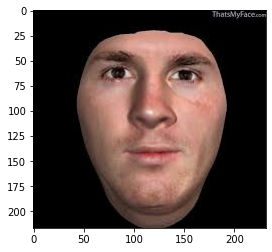

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np

final_image= cv2.resize(img,(224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [ ]:
predictions = my_model.predict(final_image)

In [ ]:
predictions

array([[0.99849737]], dtype=float32)